In [1]:
import pandas as pd
import plotly.express as px
import os

In [2]:
data_df = pd.read_csv('claims_sample_data.csv')
data_df.shape

(52152, 5)

##### Quick look on data

In [3]:
data_df.dtypes

MONTH                int64
SERVICE_CATEGORY    object
CLAIM_SPECIALTY     object
PAYER               object
PAID_AMOUNT          int64
dtype: object

In [4]:
for col in data_df.columns:
    print(col, data_df[pd.isna(data_df[col])].shape[0])

MONTH 0
SERVICE_CATEGORY 0
CLAIM_SPECIALTY 251
PAYER 0
PAID_AMOUNT 0


In [5]:
# try to change int to datetime
# this produce an error for '201900', coerce for a while
data_df['paid_month'] = pd.to_datetime(data_df['MONTH'], format="%Y%m", errors='coerce')

In [6]:
data_df.SERVICE_CATEGORY.unique()

array(['AncillaryFFS', 'ASCServices', 'ERServices', 'InpatientServices',
       'OutpatientServices', 'PCPEncounter', 'PCPFFS', 'SNFServices',
       'SpecialistFFS', 'SpecialistsFFS'], dtype=object)

In [7]:
data_df.PAYER.unique()

array(['Payer F', 'Payer H', 'Payer O', 'Payer W', 'Payer UN', 'Payer CA',
       'Payer CO', 'Payer S', 'Payer B', 'Payer UL'], dtype=object)

In [8]:
data_df.CLAIM_SPECIALTY.nunique()

905

##### Start dashboard below

In [9]:
# run this and go to url to get a look on the data
working_folder = os.getcwd()
os.system('python ' + os.path.join(working_folder, 'dashboard.py'))

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app 'dashboard' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


Address already in use
Port 8050 is in use by another program. Either identify and stop that program, or start the server with a different port.


256

##### Correlations in data

In [10]:
# how total paids per month correlated over SERVICE_CATEGORY
dff = data_df.groupby(['paid_month', 'SERVICE_CATEGORY'], as_index=False).agg({'PAID_AMOUNT': 'sum'}).set_index('paid_month')
dff.pivot_table('PAID_AMOUNT', 'paid_month', 'SERVICE_CATEGORY').corr()

SERVICE_CATEGORY,ASCServices,AncillaryFFS,ERServices,InpatientServices,OutpatientServices,PCPEncounter,PCPFFS,SNFServices,SpecialistFFS,SpecialistsFFS
SERVICE_CATEGORY,,,,,,,,,,
ASCServices,1.000000,0.544560,0.775537,0.664597,0.811959,-0.019295,0.783130,0.631207,0.179828,0.783668
AncillaryFFS,0.544560,1.000000,0.563190,0.636375,0.664955,-0.095753,0.496099,0.677871,0.500487,0.764841
ERServices,0.775537,0.563190,1.000000,0.693839,0.799342,-0.025887,0.686885,0.739043,-0.068663,0.723242
InpatientServices,0.664597,0.636375,0.693839,1.000000,0.702831,-0.191002,0.676121,0.702822,0.036905,0.736521
OutpatientServices,0.811959,0.664955,0.799342,0.702831,1.000000,-0.055326,0.702702,0.656486,0.269074,0.807285
PCPEncounter,-0.019295,-0.095753,-0.025887,-0.191002,-0.055326,1.000000,-0.202964,-0.204721,-0.082560,-0.295712
PCPFFS,0.783130,0.496099,0.686885,0.676121,0.702702,-0.202964,1.000000,0.646871,0.036657,0.766591
SNFServices,0.631207,0.677871,0.739043,0.702822,0.656486,-0.204721,0.646871,1.000000,-0.061351,0.722618
SpecialistFFS,0.179828,0.500487,-0.068663,0.036905,0.269074,-0.082560,0.036657,-0.061351,1.000000,0.520483


In [11]:
# how total paids per month correlated over PAYERs
dff = data_df.groupby(['paid_month', 'PAYER'], as_index=False).agg({'PAID_AMOUNT': 'sum'}).set_index('paid_month')
dff.pivot_table('PAID_AMOUNT', 'paid_month', 'PAYER').corr()

PAYER,Payer B,Payer CA,Payer CO,Payer F,Payer H,Payer O,Payer S,Payer UL,Payer UN,Payer W
PAYER,,,,,,,,,,
Payer B,1.000000,0.055493,-0.273799,-0.028234,0.274060,-0.356790,-0.172741,-0.381877,0.534040,0.424958
Payer CA,0.055493,1.000000,0.271252,0.388980,0.568131,0.282218,0.224149,0.419954,0.190856,0.589926
Payer CO,-0.273799,0.271252,1.000000,0.264893,-0.185472,0.563408,0.447732,0.234609,-0.496309,-0.011046
Payer F,-0.028234,0.388980,0.264893,1.000000,0.502012,0.697138,0.285137,0.582108,-0.151945,0.396708
Payer H,0.274060,0.568131,-0.185472,0.502012,1.000000,0.135870,-0.233909,0.563745,0.513596,0.295137
Payer O,-0.356790,0.282218,0.563408,0.697138,0.135870,1.000000,0.612839,0.328770,-0.536483,0.081803
Payer S,-0.172741,0.224149,0.447732,0.285137,-0.233909,0.612839,1.000000,0.249939,-0.495402,0.049765
Payer UL,-0.381877,0.419954,0.234609,0.582108,0.563745,0.328770,0.249939,1.000000,-0.247551,0.150746
Payer UN,0.534040,0.190856,-0.496309,-0.151945,0.513596,-0.536483,-0.495402,-0.247551,1.000000,0.116361


##### Seasonality

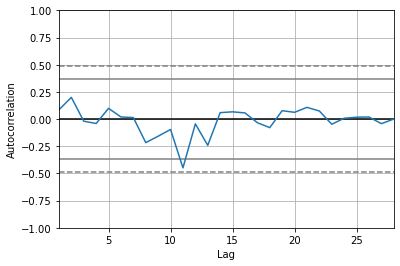

In [12]:
pd.plotting.autocorrelation_plot(data_df[data_df.paid_month < '2020-05-01'].groupby('paid_month').PAID_AMOUNT.sum());
# pd.plotting.autocorrelation_plot(data_df.groupby('paid_month').PAID_AMOUNT.sum());
# pd.plotting.autocorrelation_plot(data_df[(data_df.PAYER == 'Payer F') & (data_df.SERVICE_CATEGORY == 'InpatientServices')].groupby('paid_month').PAID_AMOUNT.sum());

### Some conclusions
##### Data quality 
* there is missing data for CLAIM_SPECIALTY (251 records)
* malformatted data for MONTH (only year, month is missed, 11 records)
* there is no data for some payers for the last month (Jul 2020)
* it seems (?) that there is not complete data for the last 2 month - maybe because of companies "reporting mechanics"
* there is strange negative total paid for PCPEncounter SERVICE_CATEGORY
##### Basic description
* data cover 32 month
* categorical types: 10 SERVICE_CATEGORY, 10 PAYER, and 905 CLAIM_SPECIALTY categories
* from these "Payer F" is biggest PAYER and "InpatientServices" is biggest SERVICE_CATEGORY: both about 45% of paids from total
* specialistFFS and SpecialistsFFS are not covered by the all payers, other SERVICE_CATEGORY are used by all payers
* only "Payer F" cover all SERVICE_CATEGORY
* "Payer UL" present in data only from Nov 2018
##### Few deeper explorations
* total paids per month are strongly (positive, up to 0.8) correlated over SERVICE_CATEGORY
* total paids per month are sometimes correlated (negative and positive, up to +/- 0.6) over PAYERS
* no strong seasonality visible in data, but May and October have maximum values 